### Stroke Prediction Analysis

####  Import all related libraries

In [52]:
# !pip install pandas


import pandas as pd
from scipy import stats
import numpy as np
from scipy import stats
import statistics
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib as mpl

#### Show the dataset

In [53]:
# Read the dataset

df=pd.read_csv('healthcare-dataset-stroke-data.csv') 
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


####  Convert column to numerical value


In [54]:
# change gender column to numerical value

output = []
for x in df['gender']:
    if x not in output:
        output.append(x)
print(output)

for i in range(len(output)):    
    df.loc[df["gender"] == output[i], "gender"] = i
    

#change ever_married column to numerical value
    
output2 = []
for x in df['ever_married']:
    if x not in output2:
        output2.append(x)
print(output2)


for i in range(len(output2)):
    df.loc[df["ever_married"] == output2[i], "ever_married"] = i
    
    
#change work_type column to numerical value
    
output3 = []
for x in df['work_type']:
    if x not in output3:
        output3.append(x)
print(output3)


for i in range(len(output3)):
    df.loc[df["work_type"] == output3[i], "work_type"] = i

    
#change Residence_type column to numerical value
    
output4 = []
for x in df['Residence_type']:
    if x not in output4:
        output4.append(x)
print(output4)


for i in range(len(output4)):
    df.loc[df["Residence_type"] == output4[i], "Residence_type"] = i


#change Residence_type column to numerical value
    
output5 = []
for x in df['smoking_status']:
    if x not in output5:
        output5.append(x)
print(output5)


for i in range(len(output5)):
    df.loc[df["smoking_status"] == output5[i], "smoking_status"] = i

['Male', 'Female', 'Other']
['Yes', 'No']
['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']
['Urban', 'Rural']
['formerly smoked', 'never smoked', 'smokes', 'Unknown']


In [55]:
# Read the data type of each column

df.dtypes


id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

#### Remove missing data from dataset

In [56]:
#Remove the missing  value

print('Dataset after dropping the rows having missing values:')

df =df.dropna()

# convent datatype to numeric

df['gender'] = pd.to_numeric(df['gender'])
df['ever_married'] = pd.to_numeric(df['ever_married'])
df['work_type'] = pd.to_numeric(df['work_type'])
df['Residence_type'] = pd.to_numeric(df['Residence_type'])
df['smoking_status'] = pd.to_numeric(df['smoking_status'])

## shuffle the dataset

new_df= df.sample(frac = 1)
df1= new_df.drop(['id'], axis=1)
df1


Dataset after dropping the rows having missing values:


C:\Users\meemk\AppData\Local\Temp\ipykernel_13212\1434335843.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = pd.to_numeric(df['gender'])
C:\Users\meemk\AppData\Local\Temp\ipykernel_13212\1434335843.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ever_married'] = pd.to_numeric(df['ever_married'])
C:\Users\meemk\AppData\Local\Temp\ipykernel_13212\1434335843.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2748,0,54.0,0,0,0,0,0,92.34,29.4,2,0
2959,1,32.0,0,0,0,0,1,147.04,35.7,3,0
2058,1,52.0,1,0,0,0,0,94.98,23.8,1,0
4845,0,55.0,0,0,0,0,1,86.58,34.2,1,0
4819,1,82.0,0,0,0,1,0,113.45,30.3,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2979,1,82.0,1,0,0,1,0,107.21,27.0,0,0
2478,1,7.0,0,0,1,3,0,156.82,17.3,3,0
5054,1,47.0,0,0,0,0,0,84.04,24.7,1,0
722,0,9.0,0,0,1,3,1,121.80,18.7,3,0


#### Visualized the dataset

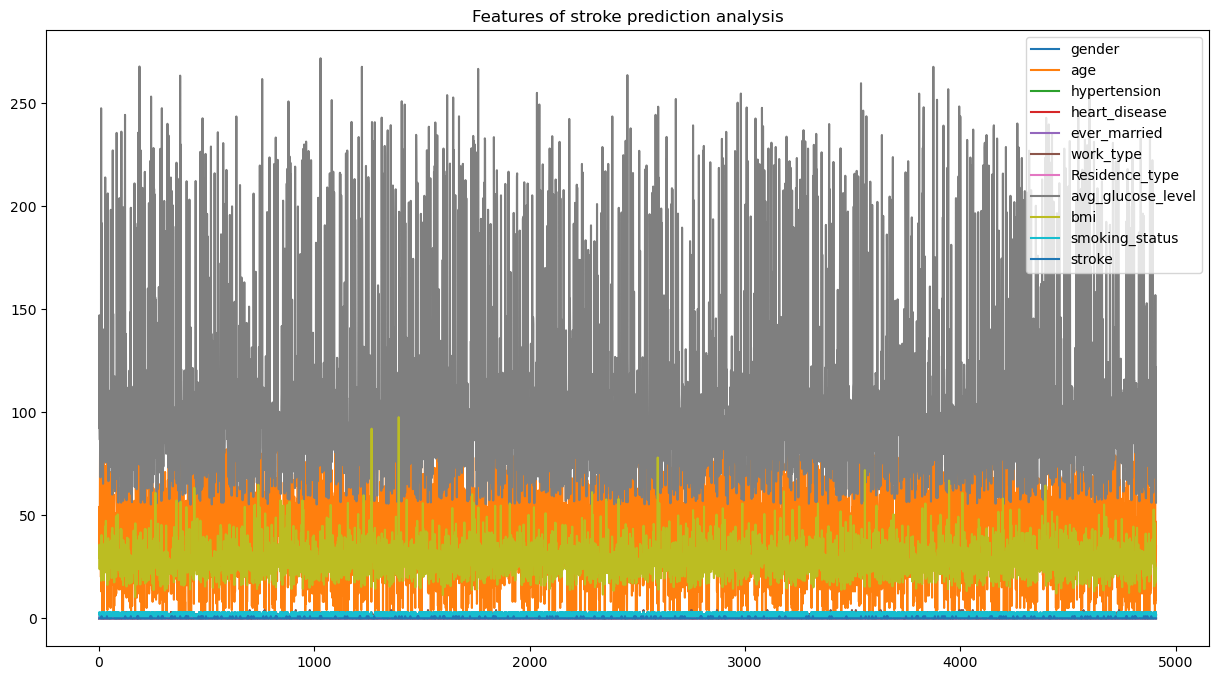

In [57]:
# Plot the graph 

x = [*range(1, 4910, 1)]

def demo(sty, i, x):
    mpl.style.use(sty)
    fig, ax = plt.subplots( figsize=(15, 8))
    ax.set_title('Features of stroke prediction analysis'.format(sty))
    
    for i in df1:  
        ax.plot(x, df1[i],  label=i)
    ax.legend()
demo('default', i, x)

### Build a Deep Learning Model

In [58]:
# Select features and target
X=df1
X = X.iloc[:, :10]  # Using double brackets to keep X as a DataFrame
y = df1['stroke']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert DataFrame to NumPy arrays
X_train_array = X_train.to_numpy()
y_train_array = y_train.to_numpy()

X_test_array = X_test.to_numpy()
y_test_array = y_test.to_numpy()

# Build a deep learning model
model = keras.Sequential([
    layers.Input(shape=(X_train_array.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using NumPy arrays
model.fit(X_train_array, y_train_array, epochs=30, batch_size=64, validation_split=0.2)


Epoch 1/30
50/50 [==============================] - 1s 6ms/step - loss: 3.0671 - accuracy: 0.7682 - val_loss: 0.6371 - val_accuracy: 0.9580
Epoch 2/30
50/50 [==============================] - 0s 2ms/step - loss: 0.3011 - accuracy: 0.9510 - val_loss: 0.1831 - val_accuracy: 0.9491
Epoch 3/30
50/50 [==============================] - 0s 2ms/step - loss: 0.1769 - accuracy: 0.9538 - val_loss: 0.1718 - val_accuracy: 0.9580
Epoch 4/30
50/50 [==============================] - 0s 2ms/step - loss: 0.1736 - accuracy: 0.9545 - val_loss: 0.1748 - val_accuracy: 0.9580
Epoch 5/30
50/50 [==============================] - 0s 2ms/step - loss: 0.1740 - accuracy: 0.9532 - val_loss: 0.1718 - val_accuracy: 0.9580
Epoch 6/30
50/50 [==============================] - 0s 2ms/step - loss: 0.1702 - accuracy: 0.9545 - val_loss: 0.1666 - val_accuracy: 0.9580
Epoch 7/30
50/50 [==============================] - 0s 2ms/step - loss: 0.1663 - accuracy: 0.9542 - val_loss: 0.1705 - val_accuracy: 0.9517
Epoch 8/30
50/50 [==

31/31 [==============================] - 0s 1ms/step


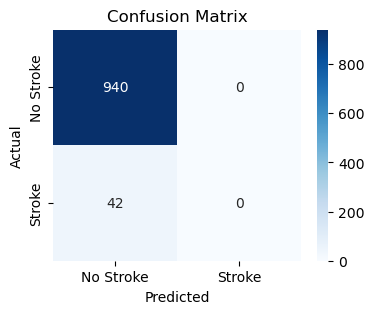

              precision    recall  f1-score   support

   No Stroke       0.96      1.00      0.98       940
      Stroke       0.00      0.00      0.00        42

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982



C:\Users\meemk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
# Generate predictions

y_pred = model.predict(X_test_array)

y_pred_binary = (y_pred > 0.5).astype(int)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test_array, y_pred_binary)

# Display the confusion matrix using Seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Stroke", "Stroke"],
            yticklabels=["No Stroke", "Stroke"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Calculate precision, recall, and F1-score
from sklearn.metrics import classification_report
report = classification_report(y_test_array, y_pred_binary, target_names=["No Stroke", "Stroke"])
print(report)


### Logistic Regression Model

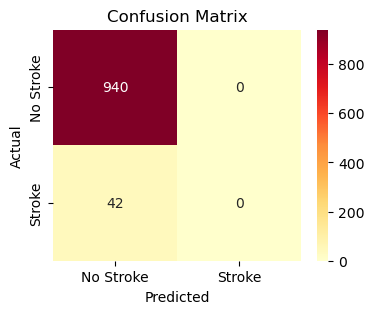

              precision    recall  f1-score   support

   No Stroke       0.96      1.00      0.98       940
      Stroke       0.00      0.00      0.00        42

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982



C:\Users\meemk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\meemk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
# logistic Regression
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using Seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlOrRd",
            xticklabels=["No Stroke", "Stroke"],
            yticklabels=["No Stroke", "Stroke"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred, target_names=["No Stroke", "Stroke"])
print(report)
